In [1]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker
import os
import pandas

headers = ["event_id", "track_id", "type", "x", "y", "z", "delta_E", "process"]

def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(2, 1, my_data) # look for electrons
    plt.scatter(arr.T[0], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    
    
def integrate_over(event_num, track_num, data, param = 6):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            integrate = integrate + data.T[param][i]
    return [event_num, track_num, integrate]
    
    
    

In [2]:
energies = os.listdir("energies/")
print(energies)

energy_list = []
for i in energies:
    energy_list.append(float(i))

energy_list = np.sort(energy_list)
print(energy_list)

['4.473', '7.246', '7.271', '5.393', '6.0835', '6.100', '7.190', '5.8803', '6.3387', '6.2838', '7.626', '6.476', '7.281', '6.5662', '7.708', '7.519', '6.9216', '6.0536', '5.850', '5.656']
[4.473  5.393  5.656  5.85   5.8803 6.0536 6.0835 6.1    6.2838 6.3387
 6.476  6.5662 6.9216 7.19   7.246  7.271  7.281  7.519  7.626  7.708 ]


In [3]:
def make_dataframe(energy_val):
    df = pandas.read_csv(f'energies/{energy_val}/EveTraParXYZdEProc.csv', header = None, names = ["event", "track", "particle", "x", "y", "z", "dE", "proc"])
    return df

class lookup:
    def __init__(self, df):
        self.df = df
        self.procnames = df.proc.unique()
        self.particlenames = df.particle.unique()
        self.eventnames = df.event.unique()
        self.tracknames = df.track.unique()
        #print("Process names: ", self.procnames)
        #print("Particle names: ", self.particlenames)
        #print("Event names: ", self.eventnames)
        #print("Track names: ", self.tracknames)
        
    def proc(self, process):
        DataFrameDict = {elem : pandas.DataFrame() for elem in self.procnames}
        for key in DataFrameDict.keys():
            DataFrameDict[key] = df[:][df.proc == key]
        return pandas.DataFrame(DataFrameDict[process])
    
    def particle(self, partic):
        DataFrameDict = {elem : pandas.DataFrame() for elem in self.particlenames}
        for key in DataFrameDict.keys():
            DataFrameDict[key] = df[:][df.particle == key]
        return pandas.DataFrame(DataFrameDict[partic])
    
    def event(self, event_num):
        DataFrameDict = {elem : pandas.DataFrame() for elem in self.eventnames}
        for key in DataFrameDict.keys():
            DataFrameDict[key] = df[:][df.event == key]
        return pandas.DataFrame(DataFrameDict[event_num])
    
    def track(self, track_num):
        DataFrameDict = {elem : pandas.DataFrame() for elem in self.tracknames}
        for key in DataFrameDict.keys():
            DataFrameDict[key] = df[:][df.track == key]
        return pandas.DataFrame(DataFrameDict[track_num])
    
    def get_names(self):
        return self.procnames, self.particlenames, self.eventnames, self.tracknames


In [4]:
make_dataframe(4.473)

,event,track,particle,x,y,z,dE,proc
0,1,1,gamma,0.000000,0.000000,101.881,-4.473000,conv
1,1,4,Ar40,0.000002,0.000001,101.881,-0.000001,ionIoni
2,1,4,Ar40,0.000002,0.000001,101.881,0.000000,NoProcess
3,1,3,e+,0.221773,-0.041401,102.318,-0.062530,msc
4,1,3,e+,0.803100,-0.120819,103.061,-0.201918,eIoni
...,...,...,...,...,...,...,...,...
2108,19,21,e-,0.718665,-58.832200,355.079,-0.012660,eIoni
2109,19,21,e-,0.718665,-58.832200,355.079,0.000000,NoProcess
2110,19,20,e-,-3.394770,-26.484600,385.033,-0.000231,msc
2111,19,20,e-,-3.395270,-26.484600,385.032,-0.009210,eIoni


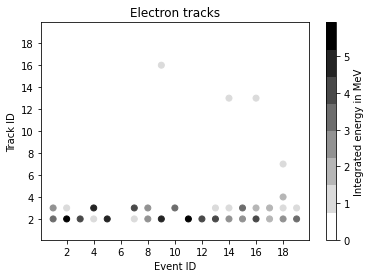

In [5]:

df = make_dataframe(7.271)
init = lookup(df)
test = init.proc("eIoni")

event_names = init.get_names()[2]


track = []
event = []
energy = []
for i in range(1, 20):
    current_event = init.event(i)
    for j in range(1, 20):
        result = df.loc[(df['event'] == i) & (df['track'] == j) & (df['proc'] == "eIoni"), 'dE'].sum()
        track.append(j)
        event.append(i)
        energy.append(result)
        

cmap = plt.cm.get_cmap("gist_gray_r", 8)

plt.scatter(event, track, c = [-1 * i for i in energy], cmap = cmap)

plt.xlabel("Event ID")
plt.ylabel("Track ID")

# set axes to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))

cbar = plt.colorbar()
cbar.set_label("Integrated energy in MeV")
plt.title("Electron tracks")
plt.show()


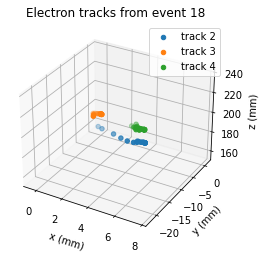

In [6]:
df = make_dataframe(7.271)
ax = plt.figure().add_subplot(projection='3d')

x = df.loc[(df['event'] == 18) & (df['track'] == 2) & (df['proc'] == "eIoni"), "x"].tolist()
y = df.loc[(df['event'] == 18) & (df['track'] == 2) & (df['proc'] == "eIoni"), "y"].tolist()
z = df.loc[(df['event'] == 18) & (df['track'] == 2) & (df['proc'] == "eIoni"), "z"].tolist()
ax.scatter(x, y, z, label = "track 2")

x = df.loc[(df['event'] == 18) & (df['track'] == 3) & (df['proc'] == "eIoni"), "x"].tolist()
y = df.loc[(df['event'] == 18) & (df['track'] == 3) & (df['proc'] == "eIoni"), "y"].tolist()
z = df.loc[(df['event'] == 18) & (df['track'] == 3) & (df['proc'] == "eIoni"), "z"].tolist()
ax.scatter(x, y, z, label = "track 3")


x = df.loc[(df['event'] == 18) & (df['track'] == 4) & (df['proc'] == "eIoni"), "x"].tolist()
y = df.loc[(df['event'] == 18) & (df['track'] == 4) & (df['proc'] == "eIoni"), "y"].tolist()
z = df.loc[(df['event'] == 18) & (df['track'] == 4) & (df['proc'] == "eIoni"), "z"].tolist()
ax.scatter(x, y, z, label = "track 4")

ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel("z (mm)")
ax.legend()
ax.set_title("Electron tracks from event 18")
plt.show()




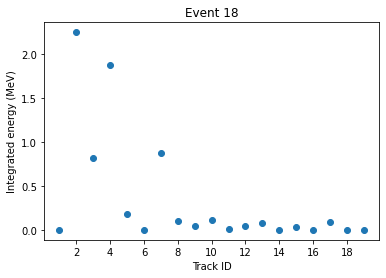

In [7]:
df = make_dataframe(7.271)



track = []
event = []
energy = []
for i in range(0, 1):
    #current_event = init.event(i)
    for j in range(1, 20):
        result = df.loc[(df['event'] == 18) & (df['track'] == j) & (df['proc'] == "eIoni"), 'dE'].sum()
        track.append(j)
        event.append(i)
        energy.append(result)
        
plt.scatter(track, [-1 * i for i in energy])

#set x-axis to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.xlabel("Track ID")
plt.ylabel("Integrated energy (MeV)")
plt.title("Event 18")
plt.show()

below: checking to classify blips or blobs in each event

In [8]:
# func to classify
# func to calculate length 
# func to classify energy

df = make_dataframe(4.473)

def check(list1, val):
    return(all(abs(x) > val for x in list1))

## this function is borrowed code
from collections import defaultdict

def find_friends(my_list):
    # Create a dictionary to store the friends
    friends = defaultdict(set)

    # Iterate over each tuple in the list
    for tuple in my_list:
        # Iterate over each element in the tuple
        for element in tuple:
            # Add all other elements in the tuple as friends of the current element
            friends[element].update(tuple)

    # Find the distinct groups of friends
    distinct_groups = []
    visited = set()
    for element in friends:
        if element not in visited:
            group = set()
            stack = [element]
            while stack:
                current = stack.pop()
                if current not in group:
                    group.add(current)
                    stack.extend(friends[current])
            distinct_groups.append(group)
            visited.update(group)

    return distinct_groups


def find_associated_blobs(test):
    blob_list = []
    for i in test:
        for j in test:
            if i == j:
                continue
            else:
                if i[0] == j[0] or i[1] == j[1] or i[0] == j[1] or i[1] == j[0]:
                    #print(i, j)
                    #print(np.unique([i, j]))
                    if all((i, j)) in blob_list:
                        continue
                    else:
                        blob_list.append(np.unique(i, j))
    return blob_list

def blips_blobs(df):
    events, tracks = lookup(df).get_names()[2], lookup(df).get_names()[3]
    #events = [1]
    #tracks = [3]

    blips = []
    blobs = []
    for i in events:
        for j, compare in enumerate(tracks):
            for k, value in enumerate(tracks):
                if compare == value:
                    continue
                else:
                    compare_x = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'x'].to_list()
                    list_x = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'x'].to_list()

                    compare_y = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'y'].to_list()
                    list_y = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'y'].to_list()

                    compare_z = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'z'].to_list()
                    list_z = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'z'].to_list()


                    if len(compare_x) > 1 and len(list_x) > 1:
                        #print(compare_x, list_x)
                        subtractx = [(x - y) for x in compare_x for y in list_x]
                        subtracty = [(x - y) for x in compare_y for y in list_y]
                        subtractz = [(x - y) for x in compare_z for y in list_z]
                        #subtract = [element1 - element2 for (element1, element2) in zip(compare_x, x)]
                        blob_distance = 10.0
                        if check(subtractx, blob_distance) or check(subtracty, blob_distance) or check(subtractz, blob_distance):
                            #print("blips: ", (compare, value))
                            blips.append(compare)
                            blips.append(value)
                        else:
                            #print("blobs: ", (compare, value))
                            blobs.append((compare, value))

        groups = find_friends(blobs)

        excluded_blips = []
        for bli in np.unique(blips):
            if bli not in np.unique(blobs):
                excluded_blips.append(bli)
        print("blobs in ", i, np.unique(blobs))
        print("friends in ", i, groups)
        print("blips in ", i, excluded_blips)
        print(energy_length(df, i, j))

blips_blobs(df)

blobs in  1 [2 3]
friends in  1 [{2, 3}]
blips in  1 [7, 8, 9, 11, 12, 13, 14, 15, 20]
blobs in  2 [2 3]
friends in  2 [{2, 3}]
blips in  2 [5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20]
blobs in  3 [2 3]
friends in  3 [{2, 3}]
blips in  3 [5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 20]
blobs in  4 [ 2  3 16 17]
friends in  4 [{2, 3}, {16, 17}]
blips in  4 [5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 20]
blobs in  5 [ 2  3  5 11 13 16 17 18]
friends in  5 [{2, 18, 3, 5}, {16, 17}, {11, 13}]
blips in  5 [6, 7, 8, 9, 12, 14, 15, 20]
blobs in  6 [ 2  3  5 11 13 16 17 18]
friends in  6 [{2, 18, 3, 5}, {16, 17}, {11, 13}]
blips in  6 [4, 6, 7, 8, 9, 12, 14, 15, 20]
blobs in  7 [ 2  3  4  5  7  8 11 13 16 17 18]
friends in  7 [{2, 3, 4, 5, 11, 13, 18}, {16, 17}, {8, 7}]
blips in  7 [6, 9, 10, 12, 14, 15, 20]
blobs in  8 [ 2  3  4  5  7  8 11 13 14 15 16 17 18]
friends in  8 [{2, 3, 4, 5, 11, 13, 18}, {16, 17}, {8, 7}, {14, 15}]
blips in  8 [6, 9, 10, 12, 20]
blobs in  9 [ 2  3  4  5  7  8 11 12 13 14 15 16 17 1

In [14]:
def energy_length(df, event, track):
    # may need eioni 
    # definitely need energy value
    # definitely need to integrate track length
    i = event
    value = track
    list_x = df.loc[(df['event'] == i) & (df['track'] == value), 'x'].to_list()
    list_y = df.loc[(df['event'] == i) & (df['track'] == value), 'y'].to_list()
    list_z = df.loc[(df['event'] == i) & (df['track'] == value), 'z'].to_list()

    x = np.array(list_x)
    y = np.array(list_y)
    z = np.array(list_z)
    return np.sqrt(x**2 + y**2 + z**2), 

def blob_span(tracks, df, event):
    candidates = []
    i = event
    for j, compare in enumerate(tracks):
        for k, value in enumerate(tracks):
            if compare == value:
                continue
            else:
                compare_x = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'x'].to_list()
                list_x = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'x'].to_list()

                compare_y = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'y'].to_list()
                list_y = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'y'].to_list()

                compare_z = df.loc[(df['event'] == i) & (df['track'] == compare) & (df['proc'] == "eIoni"), 'z'].to_list()
                list_z = df.loc[(df['event'] == i) & (df['track'] == value) & (df['proc'] == "eIoni"), 'z'].to_list()


                if len(compare_x) > 1 and len(list_x) > 1:
                    subtractx = [(x - y) for x in compare_x for y in list_x]
                    subtracty = [(x - y) for x in compare_y for y in list_y]
                    subtractz = [(x - y) for x in compare_z for y in list_z]    
                    xyz = [max(subtractx), max(subtracty), max(subtractz)]
                    
                    candidates.append([max(xyz), compare, value])
    loc = np.argmax(np.array(candidates).T[0])
    return candidates[loc]

#def blob_energy():

    

In [12]:
print(energy_length(df, 2, 3))

[-3.20685, -3.59946, -3.85242, -4.09168, -4.22676, -4.40652, -4.4909, -4.52673, -4.56994, -4.59196, -4.56487, -4.55791, -4.5688, -4.58176, -4.59782, -4.59782]
[433.08299146 433.21172275 433.01130286 432.96789018 433.05574275
 433.05473854 433.02413986 433.07010978 433.05028791 433.10335417
 433.12298774 433.12781339 433.11198994 433.09709647 433.10427554
 433.10427554]
